<a href="https://colab.research.google.com/github/PanavShah1/deep_learning/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [55]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [56]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.3.0+cu121


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [57]:
from torchvision import datasets
from torchvision import transforms
train_dataset = datasets.MNIST(root="root",
                               train=True,
                               download=True,
                               transform=transforms.ToTensor(),
                               target_transform=None)
test_dataset = datasets.MNIST(root="root",
                              train=False,
                              download=True,
                              transform=transforms.ToTensor(),
                              target_transform=None)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [58]:
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: root
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: root
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [59]:
class_names = train_dataset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [60]:
image, label = train_dataset[0]
image.shape, label

(torch.Size([1, 28, 28]), 5)

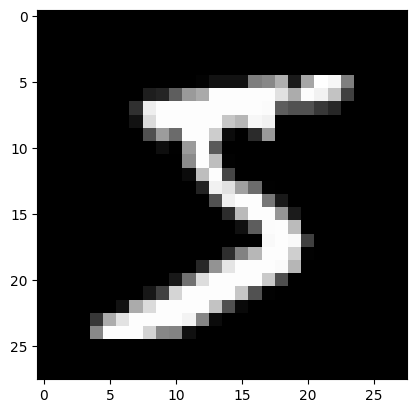

In [61]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(), cmap="gray")

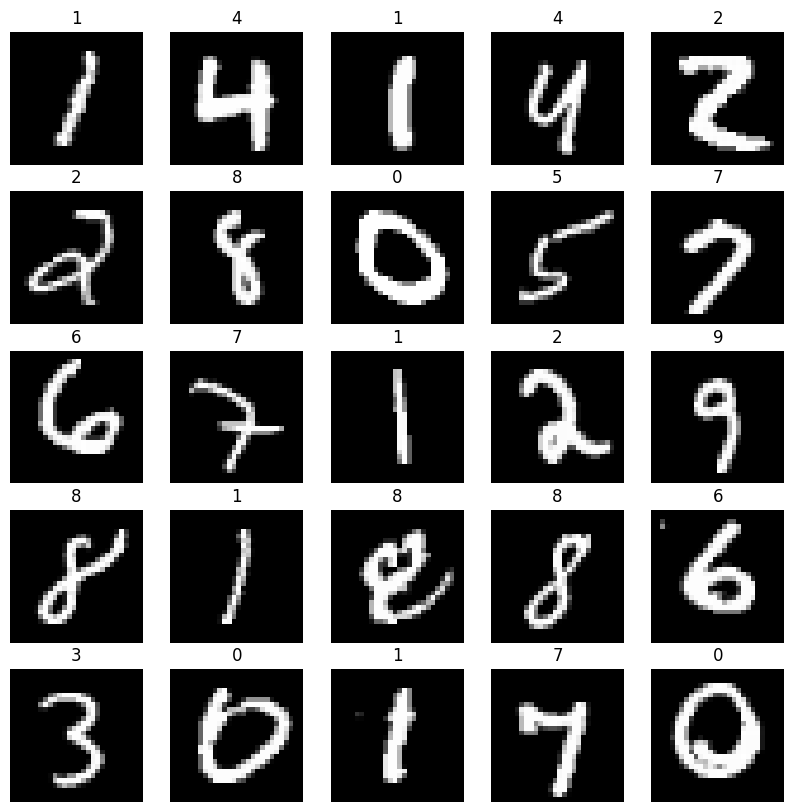

In [62]:
import random

rows, cols = 5, 5

fig = plt.figure(figsize=(10, 10))
for i in range(rows*cols):
  fig.add_subplot(rows, cols, i+1)
  rand_idx = random.randint(0, len(train_dataset))
  image, label = train_dataset[rand_idx]
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(label)
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [63]:
from torch.utils.data import DataLoader

test_batch = DataLoader(train_dataset, batch_size=32, shuffle=True)
train_batch = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [64]:
test_batch, train_batch

(<torch.utils.data.dataloader.DataLoader at 0x7b2b9657abf0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b2b96617fa0>)

In [65]:
temp_batch = next(iter(test_batch))
temp_batch

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [66]:
from torch import nn
class MNISTModelV0(nn.Module):
  def __init__(self, input_shape, hidden_layers, output_shape):
    super().__init__()
    self.layer_stack_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.layer_stack_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.layer_stack_3 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_layers*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.layer_stack_1(x)
    # print(x.shape)
    x = self.layer_stack_2(x)
    # print(x.shape)
    x = self.layer_stack_3(x)
    # print(x.shape)
    return x

model_0 = MNISTModelV0(input_shape=1,
                       hidden_layers=10,
                       output_shape=len(class_names)).to(device)

temp = model_0(image.unsqueeze(dim=1))
temp

tensor([[ 0.0544, -0.0259,  0.0537, -0.0301,  0.0644,  0.0004, -0.0976,  0.0574,
         -0.0484,  0.0195]], grad_fn=<AddmmBackward0>)

In [67]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                         lr=0.1)

In [68]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [69]:
from tqdm.auto import tqdm

In [70]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 5

for epoch in tqdm(range(epochs)):
  model_0.to(device)
  train_loss, train_acc = 0, 0

  model_0.train()
  for batch, (X, y) in enumerate(train_batch):
    X, y = X.to(device), y.to(device)
    # print(f"X:{X.shape}")

    y_pred = model_0(X)
    # print(f"y: {y}\n")
    # print(f"y_pred: {y_pred}")
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  model_0.eval()
  with torch.inference_mode():
    test_loss, test_acc = 0, 0
    for batch, (X, y) in enumerate(test_batch):
      X, y = X.to(device), y.to(device)
      test_pred = model_0(X)
      loss = loss_fn(test_pred, y)
      test_loss += loss
      test_acc += accuracy_fn(y_true=y,
                            y_pred=test_pred.argmax(dim=1))

  print(f"Train loss = {train_loss/len(train_batch)} | Train acc = {train_acc/len(train_batch)} | Test loss = {test_loss/len(test_batch)} | Test acc = {test_acc/len(test_batch)}")



  0%|          | 0/5 [00:00<?, ?it/s]

Train loss = 2.0630736351013184 | Train acc = 23.482428115015974 | Test loss = 0.5103031396865845 | Test acc = 84.22666666666667
Train loss = 0.2335883378982544 | Train acc = 92.86142172523962 | Test loss = 0.1904790848493576 | Test acc = 94.28666666666666
Train loss = 0.11896061152219772 | Train acc = 96.21605431309904 | Test loss = 0.14287826418876648 | Test acc = 96.05833333333334
Train loss = 0.08881349116563797 | Train acc = 97.11461661341853 | Test loss = 0.11906000226736069 | Test acc = 96.47666666666667
Train loss = 0.06872859597206116 | Train acc = 97.73362619808307 | Test loss = 0.12259898334741592 | Test acc = 96.22166666666666


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

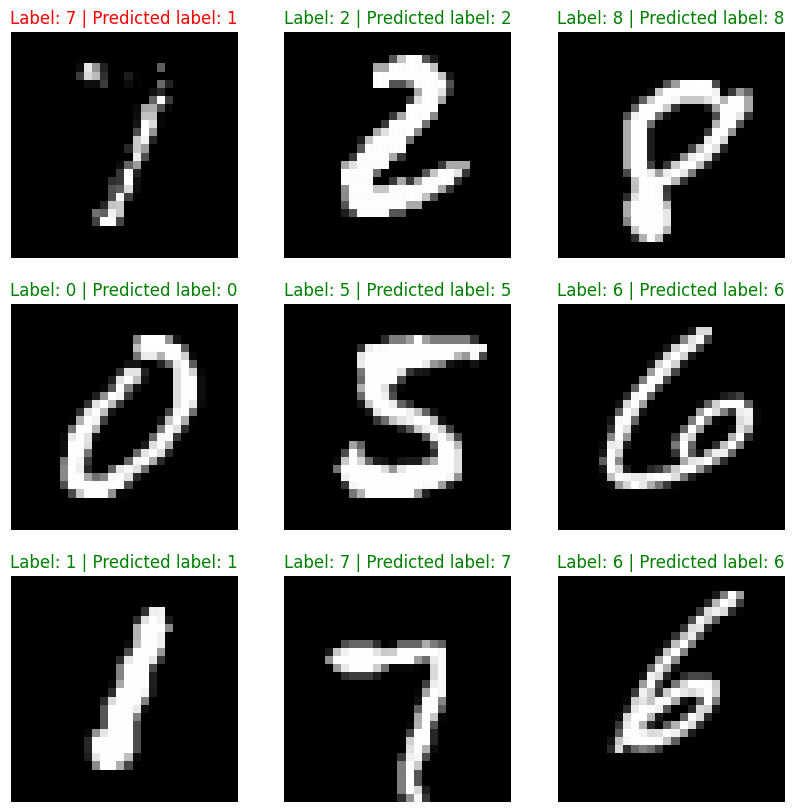

In [94]:
fig = plt.figure(figsize=(10, 10))

model_0.eval()
for i in range(0, 9):
  rand_inx = random.randint(0, len(test_dataset))
  image, label = test_dataset[rand_inx]

  pred_label = torch.argmax(model_0(image.unsqueeze(dim=1))).item()
  fig.add_subplot(3, 3, i+1)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.axis(False)
  plt.title(f"Label: {label} | Predicted label: {pred_label}", color="green" if label==pred_label else "red")

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [98]:
model_0.eval()
with torch.inference_mode():
  y_preds = []
  y_labels = []
  for X, y in tqdm(test_dataset):
    y_pred = torch.argmax(model_0(X.unsqueeze(dim=1))).item()
    y_preds.append(y_pred)
    y_labels.append(y)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [99]:
y_preds[:10], y_labels[:10]

([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [104]:
!pip install torchmetrics

  Using cached torchmetrics-1.4.0.post0-py3-none-any.whl (868 kB)
  Using cached lightning_utilities-0.11.2-py3-none-any.whl (26 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)


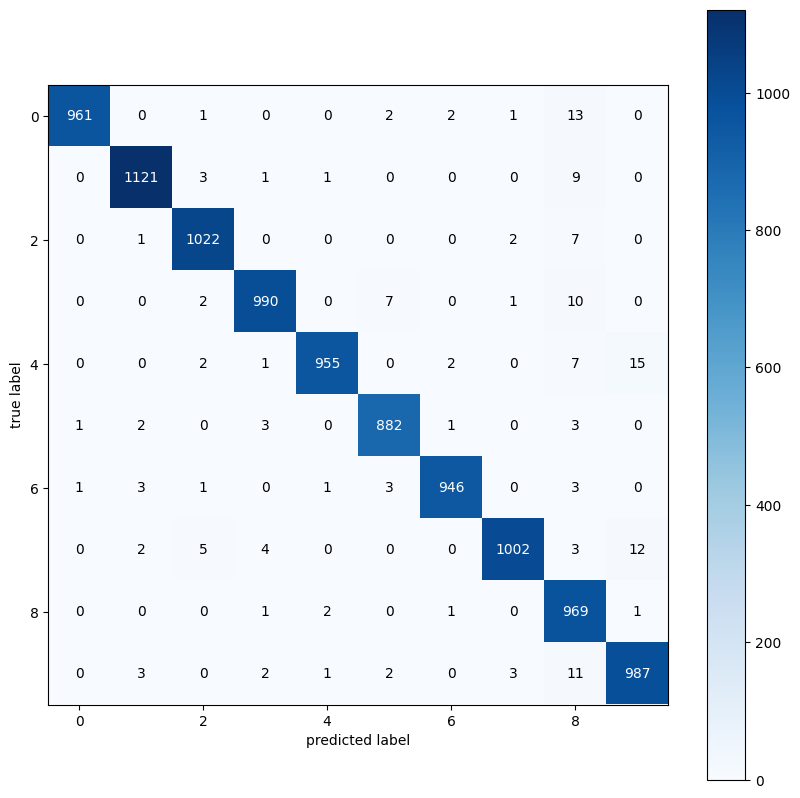

In [114]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=10)
mat = confmat(torch.tensor(y_preds), torch.tensor(y_labels))
fig, ax = plot_confusion_matrix(conf_mat=mat.numpy(),
                                figsize=(10, 10),
                                colorbar=True)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?